**Groceries Market Basket Analysis**<br>

**Nama : M Daffa Alfikri**<br>
**NIM : 211351076**<br>
**Kelas : IF Pagi A**<br>

#Import Dataset Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdaffaalfikri","key":"a78463a07a1a19d94875f1f001178055"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba

100% 455k/455k [00:00<00:00, 1.14MB/s]
100% 455k/455k [00:00<00:00, 1.14MB/s]


In [5]:
!mkdir market
!unzip groceries-dataset-for-market-basket-analysismba.zip -d market
!ls market

Archive:  groceries-dataset-for-market-basket-analysismba.zip
  inflating: market/Groceries data.csv  
  inflating: market/basket.csv       
 basket.csv  'Groceries data.csv'


#Import Libarary

In [6]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=6d4e309df328335f01017d35f254c6cc4e32c5593e6c98aadd26e60b5a5b753c
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [7]:
!pip install apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apriori: filename=apriori-1.0.0-py3-none-any.whl size=2455 sha256=a4e06f7abf7f0b64861b01167f2fcb4fa43d626ddeb3f65a05024d20811b6649
  Stored in directory: /root/.cache/pip/wheels/8c/fa/83/25b9cb17d884f97f2e62d97d0818bbed8117e89a6b09c37dc3
Successfully built apriori


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

#Data Discovery

In [9]:
df = pd.read_csv("market/Groceries data.csv")
print("DataFrame shape:", df.shape)
df.head()

DataFrame shape: (38765, 7)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [10]:
df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,year,month,day,day_of_week
23787,1611,2015-02-26,domestic eggs,2015,2,26,3
31429,3733,2014-05-23,butter,2014,5,23,4
8184,1540,2015-08-14,beef,2015,8,14,4
14515,1365,2014-09-15,other vegetables,2014,9,15,0
7309,1372,2015-06-25,whole milk,2015,6,25,3
9736,4621,2014-03-28,chicken,2014,3,28,4
10431,4076,2014-02-08,dessert,2014,2,8,5
33323,2666,2014-11-04,frozen vegetables,2014,11,4,1
25585,1174,2014-07-26,syrup,2014,7,26,5
22115,4019,2015-03-19,grapes,2015,3,19,3


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


In [13]:
val_counts = df["itemDescription"].value_counts()
val_counts.tail(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: itemDescription, dtype: int64

#EDA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


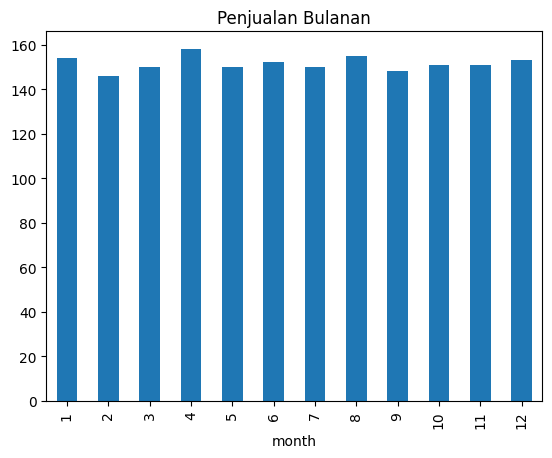

In [14]:
df.groupby('month')['itemDescription'].nunique().plot(kind='bar', title='Penjualan Bulanan')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


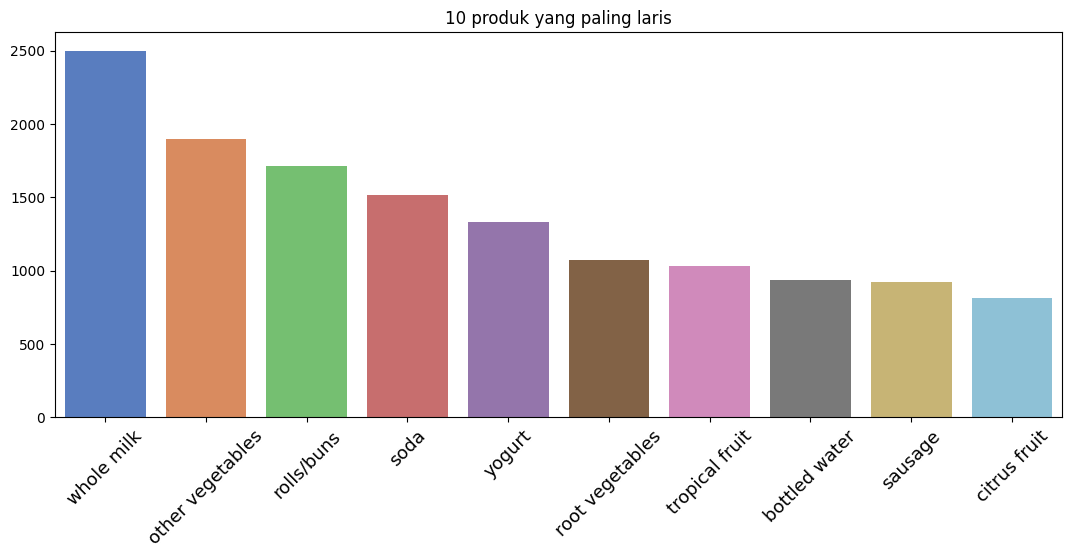

In [15]:
plt.figure(figsize=(13,5))
sns.set_palette("muted")

sns.barplot(x = df["itemDescription"].value_counts()[:10].index,
            y = df["itemDescription"].value_counts()[:10].values)
plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 produk yang paling laris')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


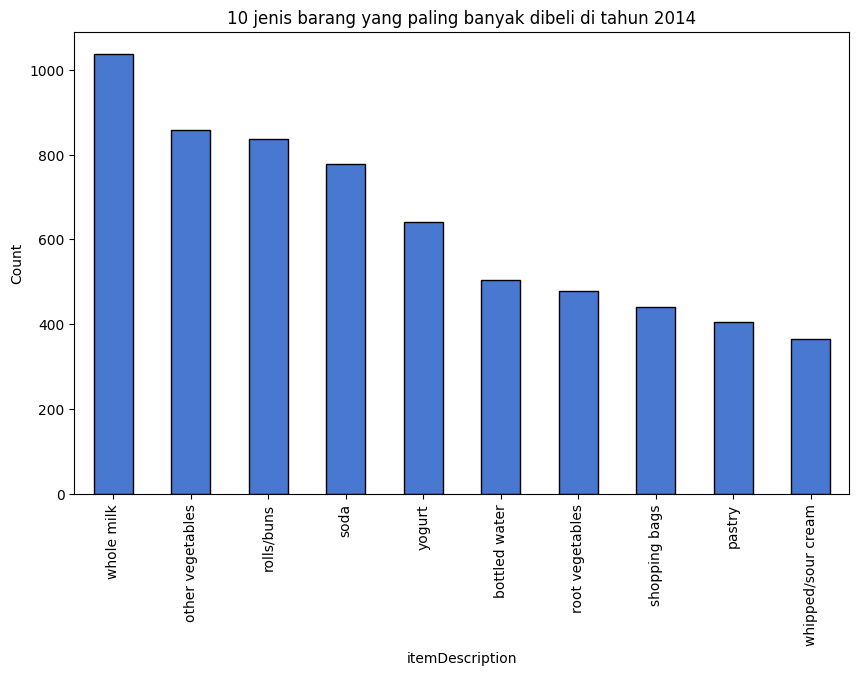

In [16]:
df_2014 = df[df['year'] == 2014]
top_10_2014 = df_2014['itemDescription'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_10_2014.plot(kind='bar', edgecolor='black')
plt.xlabel('itemDescription')
plt.ylabel('Count')
plt.title('10 jenis barang yang paling banyak dibeli di tahun 2014')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


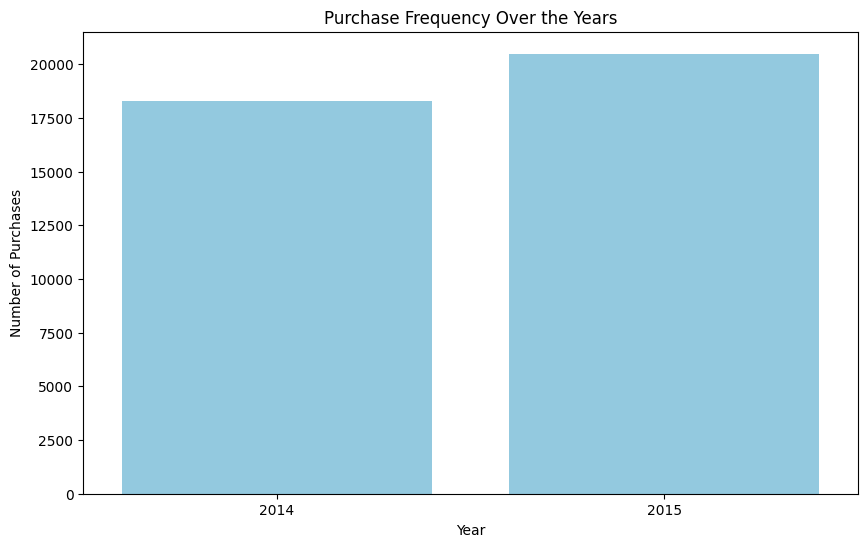

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
year_purchase_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=year_purchase_counts.index, y=year_purchase_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.title('Purchase Frequency Over the Years')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([0, 1]), [Text(0, 0, '2015'), Text(1, 0, '2014')])

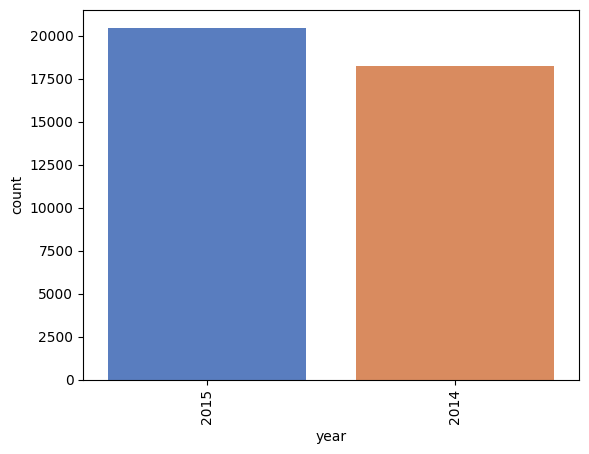

In [18]:
sns.countplot(x = 'year', data = df, order = df['year'].value_counts().iloc[:25].index)
plt.xticks(rotation=90)

#Data Preparation

In [19]:
print('Dataset Information: \n')
print(df.info())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   year             38765 non-null  int64         
 4   month            38765 non-null  int64         
 5   day              38765 non-null  int64         
 6   day_of_week      38765 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.1+ MB
None


In [20]:
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

   Member_number       Date   itemDescription  year  month  day  day_of_week
0           1808 2015-07-21    tropical fruit  2015      7   21            1
1           2552 2015-05-01        whole milk  2015      5    1            4
2           2300 2015-09-19         pip fruit  2015      9   19            5
3           1187 2015-12-12  other vegetables  2015     12   12            5
4           3037 2015-01-02        whole milk  2015      1    2            4
5           4941 2015-02-14        rolls/buns  2015      2   14            5
6           4501 2015-08-05  other vegetables  2015      8    5            2
7           3803 2015-12-23        pot plants  2015     12   23            2
8           2762 2015-03-20        whole milk  2015      3   20            4
9           4119 2015-12-02    tropical fruit  2015     12    2            2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
print('Unique itemDescription: ', df['itemDescription'].nunique())

Unique itemDescription:  167


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
print('Unique itemDescription: ', df['itemDescription'].nunique())
print( '\n', df['itemDescription'].unique())

Unique itemDescription:  167

 ['tropical fruit' 'whole milk' 'pip fruit' 'other vegetables' 'rolls/buns'
 'pot plants' 'citrus fruit' 'beef' 'frankfurter' 'chicken' 'butter'
 'fruit/vegetable juice' 'packaged fruit/vegetables' 'chocolate'
 'specialty bar' 'butter milk' 'bottled water' 'yogurt' 'sausage'
 'brown bread' 'hamburger meat' 'root vegetables' 'pork' 'pastry'
 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham' 'turkey'
 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour' 'sugar'
 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes' 'processed cheese'
 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta' 'popcorn'
 'finished products' 'beverages' 'bottled beer' 'dessert' 'dog food'
 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine' 'meat'
 'ice cream' 'hard cheese' 'cream cheese ' 'liquor' 'pickled vegetables'
 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions' 'hair spray'
 'photo/film' 'domestic eggs' 'margarine' 'shopping bags' 'salt' 'oil'
 'whippe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
print(df.isnull().sum().sort_values(ascending=False))

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
print(df[df['itemDescription']=='NONE'])

Empty DataFrame
Columns: [Member_number, Date, itemDescription, year, month, day, day_of_week]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print(df.head())

   Member_number       Date   itemDescription  year  month  day  day_of_week  \
0           1808 2015-07-21    tropical fruit  2015      7   21            1   
1           2552 2015-05-01        whole milk  2015      5    1            4   
2           2300 2015-09-19         pip fruit  2015      9   19            5   
3           1187 2015-12-12  other vegetables  2015     12   12            5   
4           3037 2015-01-02        whole milk  2015      1    2            4   

   Year  Month  Day  
0  2015      7   21  
1  2015      5    1  
2  2015      9   19  
3  2015     12   12  
4  2015      1    2  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
print(df.info())
print(df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
 3   year             38765 non-null  int64         
 4   month            38765 non-null  int64         
 5   day              38765 non-null  int64         
 6   day_of_week      38765 non-null  int64         
 7   Year             38765 non-null  int64         
 8   Month            38765 non-null  int64         
 9   Day              38765 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 3.0+ MB
None
   Member_number       Date   itemDescription  year  month  day  day_of_week  \
0           1808 2015-07-21    tropical fruit  2015      7   21            1   
1           2552 2015

#Modeling

In [27]:
transaction_list = df.groupby('Member_number')['itemDescription'].agg(set).tolist()
transaction_list = [items for items in transaction_list if len(items) > 0]

print(len(transaction_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3898


In [28]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
15184,"(whole milk, sausage, other vegetables)","(yogurt, rolls/buns)",0.013597,0.270408,2.428689
15185,"(yogurt, rolls/buns)","(whole milk, sausage, other vegetables)",0.013597,0.122120,2.428689
15177,"(other vegetables, yogurt, rolls/buns)","(whole milk, sausage)",0.013597,0.259804,2.428575
15192,"(whole milk, sausage)","(other vegetables, yogurt, rolls/buns)",0.013597,0.127098,2.428575
12800,"(curd, yogurt)","(whole milk, sausage)",0.010005,0.248408,2.322046
...,...,...,...,...,...
7644,(soda),"(frozen vegetables, other vegetables)",0.014366,0.045827,1.003549
985,(pip fruit),(cream cheese ),0.015136,0.088722,1.002428
984,(cream cheese ),(pip fruit),0.015136,0.171014,1.002428
477,(brown bread),(whipped/sour cream),0.021036,0.154717,1.000144


In [30]:
import itertools
def generate_candidates(prev_candidates, k):
    candidates = set()
    for i in range(len(prev_candidates)):
        for j in range(i + 1, len(prev_candidates)):
            itemset1 = set(prev_candidates[i])
            itemset2 = set(prev_candidates[j])
            union_set = itemset1.union(itemset2)
            if len(union_set) == k:
                candidates.add(tuple(sorted(union_set)))
    return list(candidates)

def prune_candidates(candidates, prev_frequent_sets):
    pruned_candidates = []
    for candidate in candidates:
        subsets = [set(x) for x in itertools.combinations(candidate, len(candidate) - 1)]
        is_valid = all(subset in prev_frequent_sets for subset in subsets)
        if is_valid:
            pruned_candidates.append(candidate)
    return pruned_candidates

def apriori(transactions, min_support):
    itemsets = [frozenset([item]) for item in set(item for transaction in transactions for item in transaction)]
    frequent_itemsets = []

    k = 2
    while itemsets:
        candidates = generate_candidates(itemsets, k)
        item_counts = {candidate: 0 for candidate in candidates}

        for transaction in transactions:
            for candidate in candidates:
                if set(candidate).issubset(transaction):
                    item_counts[candidate] += 1

        frequent_itemsets_k = [itemset for itemset, count in item_counts.items() if count / len(transactions) >= min_support]
        frequent_itemsets.extend(frequent_itemsets_k)

        itemsets = prune_candidates(generate_candidates(frequent_itemsets_k, k+1), frequent_itemsets_k)
        k += 1

    return frequent_itemsets

# Contoh Penggunaan
transactions = [
    ['whole milk', 'sausage', 'curd', 'yogurt', 'other vegetables' , 'rolls/buns']
]

min_support = 0.2
result = apriori(transactions, min_support)
print("Frequent Itemsets:")
print(result)

Frequent Itemsets:
[('sausage', 'whole milk'), ('rolls/buns', 'yogurt'), ('curd', 'other vegetables'), ('other vegetables', 'whole milk'), ('curd', 'yogurt'), ('sausage', 'yogurt'), ('other vegetables', 'yogurt'), ('curd', 'rolls/buns'), ('rolls/buns', 'sausage'), ('whole milk', 'yogurt'), ('curd', 'sausage'), ('curd', 'whole milk'), ('other vegetables', 'rolls/buns'), ('rolls/buns', 'whole milk'), ('other vegetables', 'sausage')]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
